In [1]:
import numpy as np
import math

In [2]:
def SE2_theta(theta: float=0):
    return np.matrix([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def SE2_xy(x, y):
    m = np.array([
        [1, 0, x],
        [0, 1, y],
        [0, 0, 1]
    ])
    return m

def ik(theta1, theta2):
    a1 = 1.0
    a2 = 1.0
    dist_sq = x**2 + y**2

    cos_theta2 = (dist_sq - a1**2 - a2**2)/(2*a1*a2)

    cos_theta2 = max(min(cos_theta2,1),-1)
    sin_theta2 = np.sqrt(max(0,1 - cos_theta2**2))

    theta2 = math.atan2(sin_theta2, cos_theta2)

    theta1 = math.atan2(y, x) - math.atan2(a2*sin_theta2, a1 + a2*cos_theta2)

    return (theta1, theta2)

def fk(theta1, theta2):
    a1 = 1.0
    a2 = 1.0
    x = a1 * np.cos(theta1) + a2 * np.cos(theta1 + theta2)
    y = a1 * np.sin(theta1) + a2 * np.sin(theta1 + theta2)
    th = theta1 + theta2
    return (x, y, th)


In [3]:
SE2_xy(1, .25) @ np.array([.5, .5, 1])

array([1.5 , 0.75, 1.  ])

In [4]:
np.linalg.inv(SE2_xy(1, .25)) @ np.array([.5, .5, 1])

array([-0.5 ,  0.25,  1.  ])

In [5]:
(SE2_xy(1, 0.25) @ SE2_theta(np.radians(45))) @ (np.array([.5, .5, 1]))

matrix([[1.        , 0.95710678, 1.        ]])

In [6]:
np.linalg.inv(SE2_xy(1, 0.25) @ SE2_theta(np.radians(45))) @ np.array([.5, .5, 1])

matrix([[-0.1767767 ,  0.53033009,  1.        ]])

In [7]:
angles = ((0, 90), (90, 90), (90, -90), (-180, 180))
for theta_1, theta_2 in angles:
    t1, t2 = np.radians(theta_1), np.radians(theta_2)   
    print("theta_1 = {:.4f}, theta2 = {:.4f} => {}".format(t1, t2, fk(t1, t2)))

theta_1 = 0.0000, theta2 = 1.5708 => (1.0, 1.0, 1.5707963267948966)
theta_1 = 1.5708, theta2 = 1.5708 => (-0.9999999999999999, 1.0000000000000002, 3.141592653589793)
theta_1 = 1.5708, theta2 = -1.5708 => (1.0, 1.0, 0.0)
theta_1 = -3.1416, theta2 = 3.1416 => (0.0, -1.2246467991473532e-16, 0.0)


In [8]:
points = ((1, 1), (1, -1), (-1, 1), (-1, -1), (2, 1), (2, 0), (0, 2), (-2, 0))
for x, y in points:
    print(f"({x}, {y}) =>", ("{:.2f} | " * 2).format(*ik(x, y)))

(1, 1) => 0.00 | 1.57 | 
(1, -1) => -1.57 | 1.57 | 
(-1, 1) => 1.57 | 1.57 | 
(-1, -1) => -3.14 | 1.57 | 
(2, 1) => 0.46 | 0.00 | 
(2, 0) => 0.00 | 0.00 | 
(0, 2) => 1.57 | 0.00 | 
(-2, 0) => 3.14 | 0.00 | 


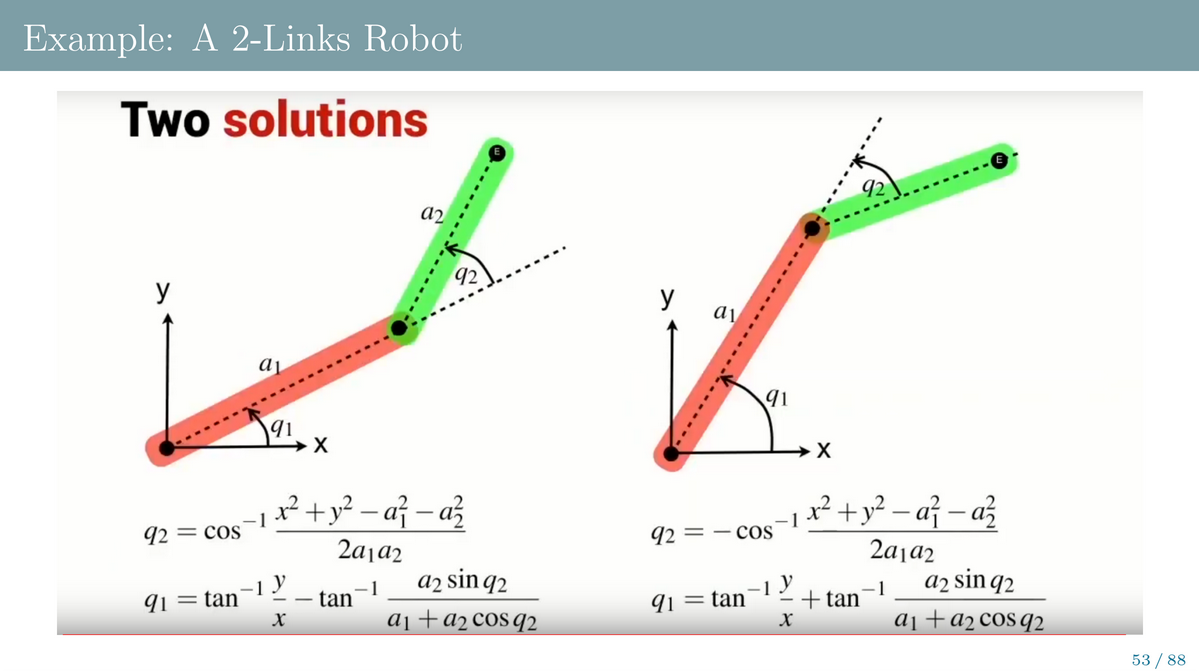

In [103]:
def fk2(theta_1, theta_2, a1=1, a2=1):
    E = (SE2_theta(theta_1) @ SE2_xy(a1, 0)) @ (SE2_theta(theta_2) @ SE2_xy(a2, 0))
    return E

def sol1(x, y, a1=1, a2=1):
    q2 = np.arccos((x**2 + y**2 - a1**2 - a2**2) / (2 * a1 * a2))
    q1 = np.arctan(y / x) - np.arctan((a2 * np.sin(q2)) / (a1 + (a2 * np.cos(q2))))
    return np.array([q1, q2])

def sol2(x, y, a1=1, a2=1):
    q2 = -np.arccos((x**2 + y**2 - a1**2 - a2**2) / (2 * a1 * a2))
    q1 = np.arctan(y / x) + np.arctan((a2 * np.sin(q2)) / (a1 + (a2 * np.cos(q2))))
    return np.array([q1, q2])

def single_solution(x, y, a1=1, a2=1):
    return -np.arccos((x**2 + y**2 - a1**2 - a2**2) / (2 * a1 * a2))

def ik2(x, y, a1=1, a2=1):
    print(f"Norma do ponto {np.linalg.norm([x, y])}\tTamanho das juntas: {a1 + a2}")
    if np.linalg.norm([x, y]) > (a1 + a2):
        print("Impossível")
        return np.array([np.nan, np.nan])
    elif np.linalg.norm([x, y]) == (a1 + a2):
        print("Singularidade")
        theta = np.arctan((y - a2)/ (x - a1))
        return np.array([(a1 + a2) * np.cos(theta), 0])
    
    else:
        print("Duas soluções")
        return np.matrix([sol1(x, y), sol2(x, y)])

In [105]:
fk2(np.radians(90), np.radians(90))

matrix([[-1.0000000e+00, -1.2246468e-16, -1.0000000e+00],
        [ 1.2246468e-16, -1.0000000e+00,  1.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [98]:
ik2(0, 2)

Norma do ponto 2.0	Tamanho das juntas: 2
Singularidade


array([1.41421356, 0.        ])

In [29]:
ik2(2, 0)

array([nan, nan])

In [25]:
np.linalg.norm([1, 1])

1.4142135623730951